# Importing Packages


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=25,12
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [50]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

# Covid Cases In India

---


## Data Preprocessing


In [51]:
covid_cases_in_india = pd.read_excel(r"./data/Covid_cases_in_India.xlsx")
covid_cases_in_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [52]:
covid_cases_in_india.drop(["S. No."], axis=1, inplace=True)
covid_cases_in_india

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [53]:
covid_cases_in_india["Total Cases"] = (
    covid_cases_in_india["Total Confirmed cases ( Foreign National )"]
    + covid_cases_in_india["Total Confirmed cases (Indian National)"]
)
covid_cases_in_india["Active Cases"] = covid_cases_in_india["Total Cases"] - (
    covid_cases_in_india["Death"] + covid_cases_in_india["Cured"]
)
covid_cases_in_india

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


## Visualizing Dataframe


In [54]:
covid_cases_in_india.style.background_gradient(cmap="Purples")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [55]:
Total_active_cases = (
    covid_cases_in_india.groupby("Name of State / UT")["Active Cases"]
    .sum()
    .to_frame()
    .reset_index()
)
Total_active_cases.style.background_gradient(cmap="Reds")

,Name of State / UT,Active Cases
0,Andhra Pradesh,11
1,Bihar,6
2,Chandigarh,7
3,Chhattisgarh,6
4,Delhi,32
5,Goa,6
6,Gujarat,40
7,Haryana,19
8,Himachal Pradesh,3
9,Jammu and Kashmir,16


## Visualizing DataFrame using pandas (plot, iplot)


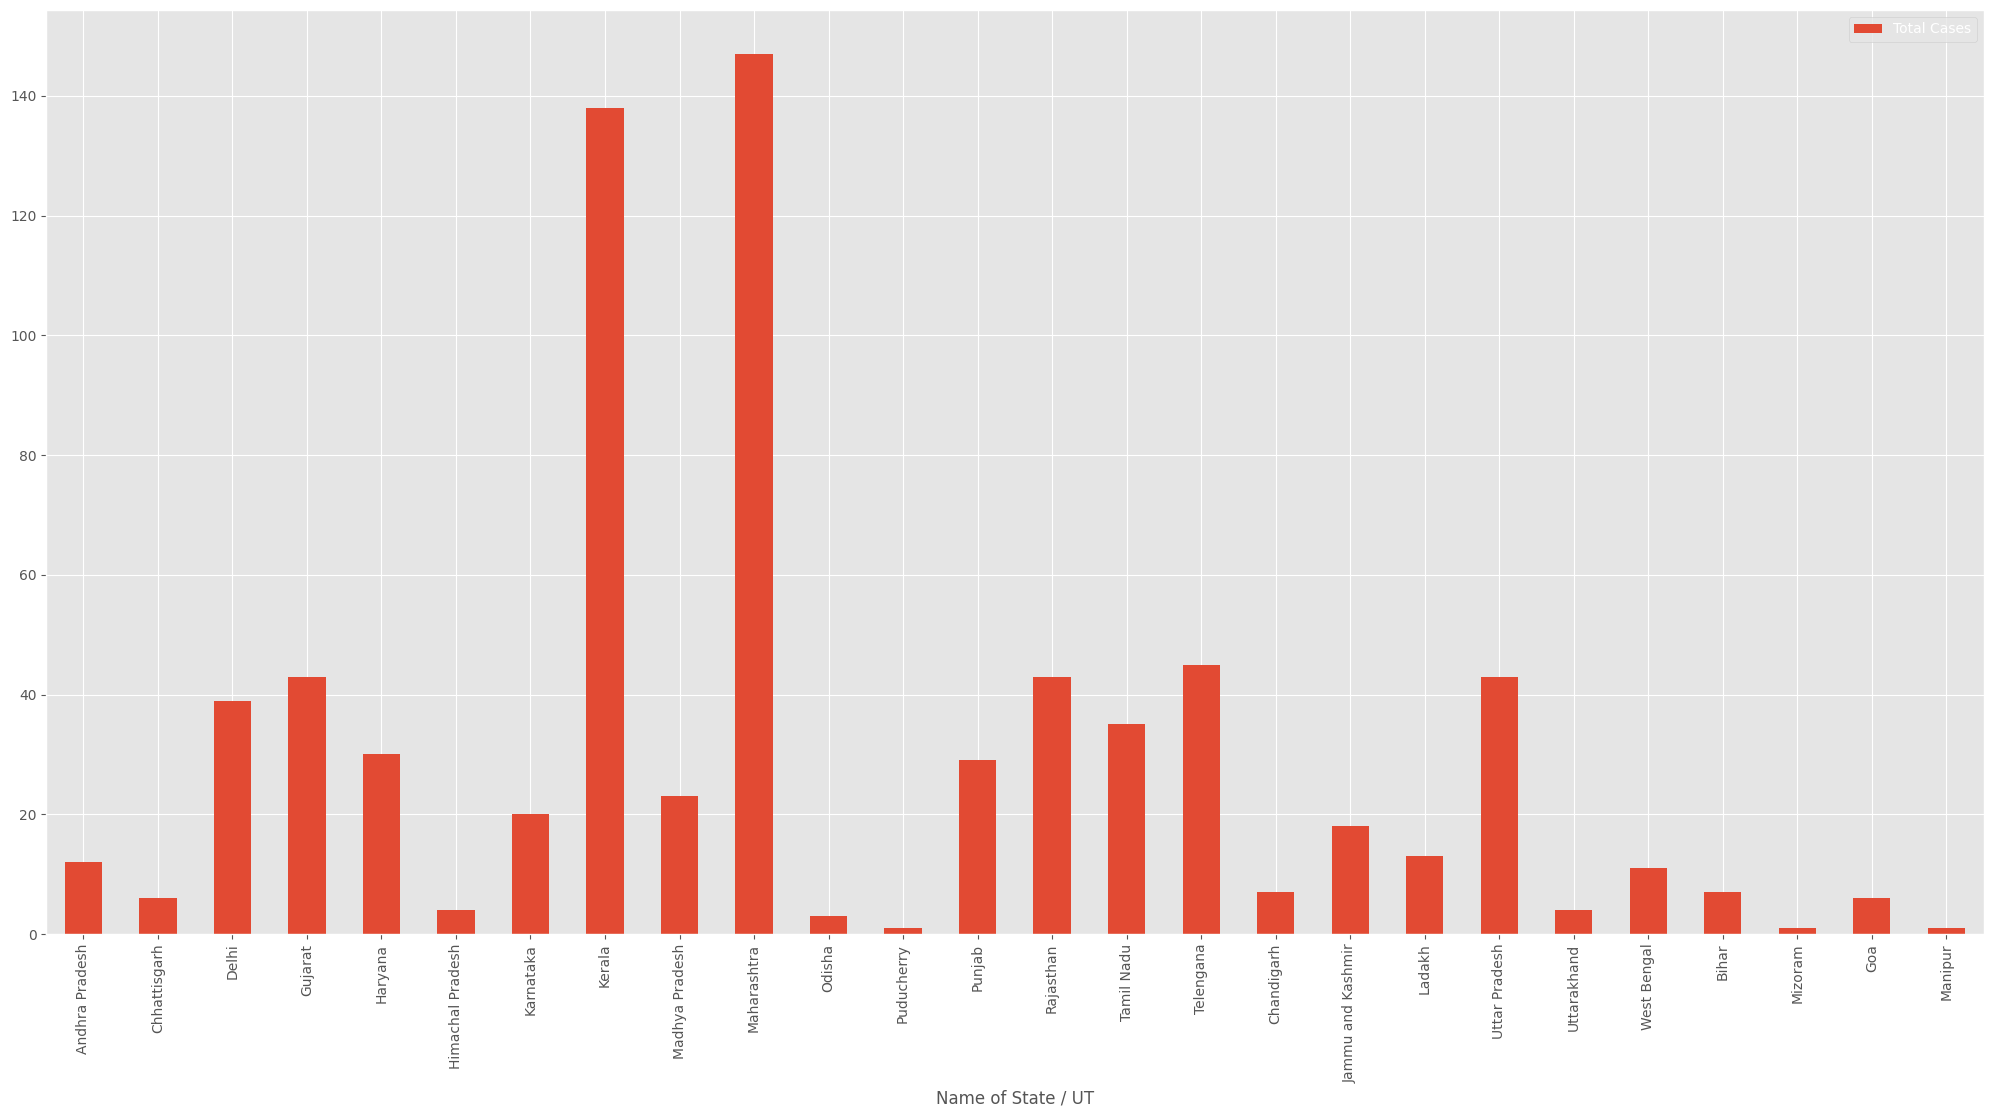

In [56]:
covid_cases_in_india.plot(kind="bar", x="Name of State / UT", y="Total Cases")
plt.show()


covid_cases_in_india.iplot(kind="bar", x="Name of State / UT", y="Total Cases")
plt.show()

covid_cases_in_india.iplot(
    kind="scatter",
    x="Name of State / UT",
    y=["Total Cases", "Death"],
    mode="markers+lines",
    size=7,
    colors=["darkblue", "red"],
)
plt.show()

## Visualizing Data using Plotly express


In [57]:
px.bar(covid_cases_in_india, x="Name of State / UT", y="Total Cases")

## Visualizing Data using Plotly Graph Objects


In [58]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=covid_cases_in_india["Name of State / UT"],
        y=covid_cases_in_india["Total Cases"],
    )
)
fig.update_layout(
    title_text="Total Cases in India",
    # xaxis=dict(title="Name of State / UT", yaxis=dict(title="Total Cases")),
    plot_bgcolor="#282828",
    colorway=["#08fdd8"],
    paper_bgcolor="#282828",
    font=dict(color="white"),
)

## GeoSpatial Data


### Preprocessing


In [59]:
indian_coordinates = pd.read_excel(r"./data/Indian Coordinates.xlsx")
indian_coordinates

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [60]:
covid_in_india = pd.merge(
    indian_coordinates, covid_cases_in_india, on="Name of State / UT"
)
covid_in_india

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


### Visualization using folium


In [61]:
map = folium.Map(location=[20, 70], zoom_start=5, tiles="cartodbpositron")

for lat, lon, value, name in zip(
    covid_in_india["Latitude"],
    covid_in_india["Longitude"],
    covid_in_india["Total Cases"],
    covid_in_india["Name of State / UT"],
):
    folium.CircleMarker(
        [lat, lon],
        radius=value * 0.8,
        popup=(
            "<strong>State</strong>: " + str(name).capitalize() + "<br>"
            "<strong>Total Cases</strong>: " + str(value) + "<br>"
        ),
        color="red",
        fill_color="red",
        fill_opacity=0.4,
    ).add_to(map)
map

## Visualizing Cured out of Total Cases State wise using Seaborn


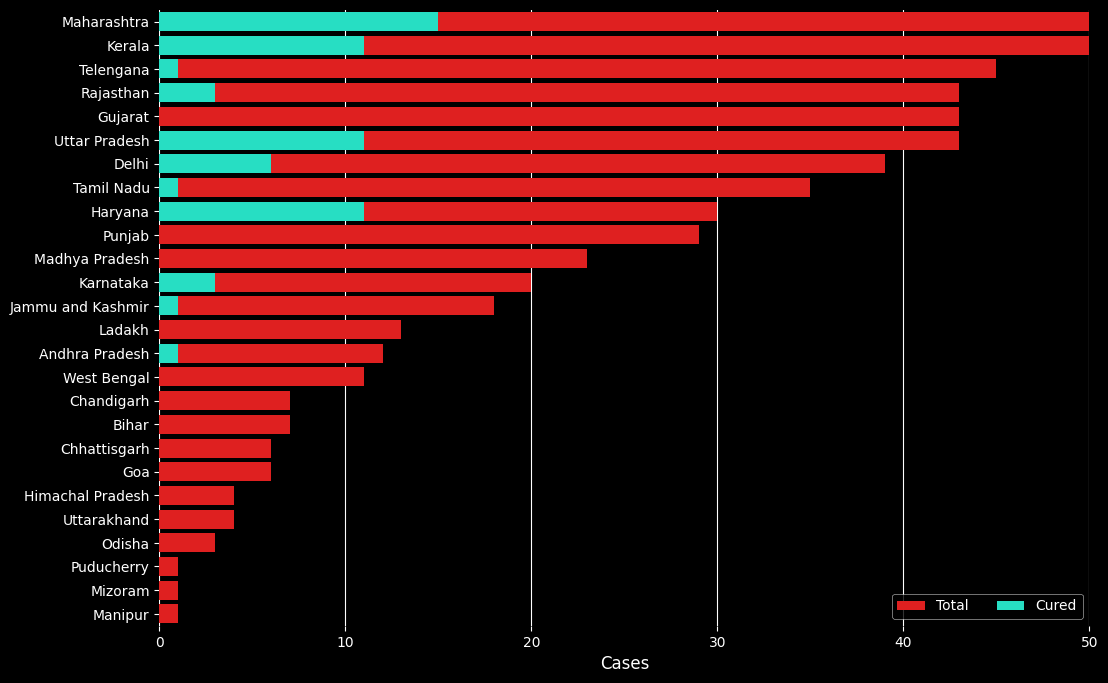

In [62]:
plt.style.use("dark_background")
f, ax = plt.subplots(figsize=(12, 8))
data = covid_cases_in_india[["Name of State / UT", "Total Cases", "Cured", "Death"]]
data.sort_values("Total Cases", ascending=False, inplace=True)
sns.set_color_codes("pastel")
sns.barplot(
    x="Total Cases", y="Name of State / UT", data=data, label="Total", color="red"
)
# sns.set_color_codes("muted")
sns.barplot(
    x="Cured", y="Name of State / UT", data=data, label="Cured", color="#08fdd8"
)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(
    xlim=(0, 50),
    ylabel="",
    xlabel="Cases",
)
sns.despine(left=True, bottom=True)

# Cumulative Cases in India, South Korea, Italy, Wuhan

---


## Importing Dataset


In [63]:
countries = ["India", "Italy", "Korea", "Wuhan"]
per_day_cases = {}
for country in countries:
    per_day_cases[country] = pd.read_excel(
        r"./data/per_day_cases.xlsx", parse_dates=True, sheet_name=country
    )

## Visualizing using Plotly Express


In [64]:
# fig = plt.figure(figsize=(10, 5), dpi=200)
# axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# axes.bar(
#     per_day_cases_in_India["Date"], per_day_cases_in_India["Total Cases"], color="red"
# )
# axes.set_xlabel("Date")
# axes.set_ylabel("Total Cases")
# axes.set_title("Confirmed Cases in India")
# plt.show()
for country in countries:
    fig = px.bar(
        per_day_cases[country],
        x="Date",
        y="Total Cases",
        color="Total Cases",
        title=f"Confirmed Cases in {country}",
    )
    fig.show()

## Vizialization of subplots using Plotly graph objects


In [65]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2,
    cols=2,
    specs=[
        [{}, {}],
        [{}, {}],
    ],
    subplot_titles=("South Korea", "Italy", "India", "Wuhan"),
)

fig.add_trace(
    go.Bar(
        x=per_day_cases["Korea"]["Date"],
        y=per_day_cases["Korea"]["Total Cases"],
        marker=dict(color=per_day_cases["Korea"]["Total Cases"], coloraxis="coloraxis"),
    ),
    1,
    1,
)

fig.add_trace(
    go.Bar(
        x=per_day_cases["Italy"]["Date"],
        y=per_day_cases["Italy"]["Total Cases"],
        marker=dict(color=per_day_cases["Italy"]["Total Cases"], coloraxis="coloraxis"),
    ),
    1,
    2,
)

fig.add_trace(
    go.Bar(
        x=per_day_cases["India"]["Date"],
        y=per_day_cases["India"]["Total Cases"],
        marker=dict(color=per_day_cases["India"]["Total Cases"], coloraxis="coloraxis"),
    ),
    2,
    1,
)
fig.add_trace(
    go.Bar(
        x=per_day_cases["Wuhan"]["Date"],
        y=per_day_cases["Wuhan"]["Total Cases"],
        marker=dict(color=per_day_cases["Wuhan"]["Total Cases"], coloraxis="coloraxis"),
    ),
    2,
    2,
)

fig.update_layout(
    coloraxis=dict(colorscale="Bluered_r"),
    showlegend=False,
    title_text="Total Confirmed cases(Cumulative)",
)

fig.update_layout(plot_bgcolor="rgb(230, 230, 230)")
fig.show()

# World Wide Cases

---


In [66]:
world_data = pd.read_csv("./data/worldometer_data.csv")
per_day_cases_world = pd.read_csv("./data/day_wise.csv")
full_grouped_data_world = pd.read_csv("./data/full_grouped.csv")
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


## Top 25 countries that has maximum TotalCases, TotalDeaths, TotalRecovered, ActiveCases


### Visualizing the data frame


In [67]:
world_data[
    ["TotalCases", "TotalDeaths", "TotalRecovered", "ActiveCases"]
].style.background_gradient(cmap="Reds")

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
0,5032179,162804.000000,2576668.000000,2292707.000000
1,2917562,98644.000000,2047660.000000,771258.000000
2,2025409,41638.000000,1377384.000000,606387.000000
3,871894,14606.000000,676357.000000,180931.000000
4,538184,9604.000000,387316.000000,141264.000000
5,462690,50517.000000,308848.000000,103325.000000
6,455409,20424.000000,310337.000000,124648.000000
7,366671,9889.000000,340168.000000,16614.000000
8,357710,11939.000000,192355.000000,153416.000000
9,354530,28500.000000,nan,nan


### Visualization using plotly express Tree map


In [68]:
columns = ["TotalCases", "TotalDeaths", "TotalRecovered", "ActiveCases"]
for column in columns:
    fig = px.treemap(
        world_data[0:25],
        values=column,
        path=["Country/Region"],
        title=f"<b>Tree map of Different countries with respect to their {column}</b>",
        template="plotly_dark",
    )
    fig.show()

## Trend of Confirmed, Deaths, Recovered, Active Cases


### Vizualising using Plotly's Line graph


In [69]:
px.line(
    per_day_cases_world,
    x="Date",
    y=["Confirmed", "Deaths", "Recovered", "Active"],
    title="Trend of Confirmed, Deaths, Recovered & Active Cases",
    template="plotly_dark",
)

## Exploratory Data Analysis


### Visualising population to tests done ratio


#### Visualization top 20 countries


In [70]:
world_data["PopulationTest_Ratio"] = world_data["Population"] / world_data["TotalTests"]
world_data[["Country/Region", "PopulationTest_Ratio"]].sort_values(
    by="PopulationTest_Ratio", ascending=False
)[0:20].style.background_gradient(cmap="Blues")

,Country/Region,PopulationTest_Ratio
131,Yemen,249057.475000
78,Sudan,109584.877805
143,Niger,2682.438467
127,Guinea-Bissau,1314.851333
120,South Sudan,930.469279
87,Guinea,913.785313
178,Papua New Guinea,829.293949
118,Mali,807.208214
164,Burundi,763.559370
26,Egypt,759.381667


#### Visualization using plotly's bar plot


In [71]:
px.bar(
    world_data.iloc[0:25],
    x="Country/Region",
    y="PopulationTest_Ratio",
    color=world_data["PopulationTest_Ratio"][0:25],
    template="plotly_dark",
    title="<b>Population to Tests done ratio</b>",
)

### Top 25 countries that are badly effected by Covid-19


In [72]:
px.bar(
    world_data.iloc[0:25],
    x="Country/Region",
    y=[
        "Serious,Critical",
        "TotalDeaths",
        "TotalRecovered",
        "ActiveCases",
        "TotalCases",
    ],
    template="plotly_dark",
)

#### Worst 20 countries having max. Confirmed Cases


In [73]:
fig = px.bar(
    world_data.iloc[0:20],
    y="Country/Region",
    x="TotalCases",
    color="TotalCases",
    text="TotalCases",
)
fig.update_layout(
    template="plotly_dark",
    title_text="<b>Top 20 countries of Total confirmed cases</b>",
)
fig.show()

#### Worst 20 countries having max. total deaths


In [74]:
fig = px.bar(
    world_data.sort_values(by="TotalDeaths", ascending=False)[0:20],
    y="Country/Region",
    x="TotalDeaths",
    color="TotalDeaths",
    text="TotalDeaths",
)
fig.update_layout(
    template="plotly_dark", title_text="<b>Top 20 countries of Total deaths</b>"
)
fig.show()

#### Worst 20 countries having max. active cases


In [75]:
fig = px.bar(
    world_data.sort_values(by="ActiveCases", ascending=False)[0:20],
    y="Country/Region",
    x="ActiveCases",
    color="ActiveCases",
    text="ActiveCases",
)
fig.update_layout(
    template="plotly_dark", title_text="<b>Top 20 countries of Total Active cases"
)
fig.show()

#### Top 20 countries having max. recovered cases


In [76]:
fig = px.bar(
    world_data.sort_values(by="TotalRecovered", ascending=False)[:20],
    y="Country/Region",
    x="TotalRecovered",
    color="TotalRecovered",
    text="TotalRecovered",
)
fig.update_layout(
    template="plotly_dark", title_text="<b>Top 20 countries of Total Recovered"
)
fig.show()

#### Conclusion

**Based on the observed trends, it is consistently evident that the countries most affected by Covid-19, namely the USA, Brazil, India, and Russia, consistently maintain a higher position in terms of total cases, deaths, recoveries, and active cases compared to other countries. This hierarchy highlights the significant impact of the virus on these four nations, and their efforts towards recovery also exhibit similar patterns.**


## In depth analysis of data


### Pie Chart Representation of stats of worst affected countries


In [77]:
for column in columns:
    px.pie(
        world_data[0:20],
        values=column,
        names=world_data[0:20]["Country/Region"].values,
        template="plotly_dark",
        hole=0.3,
        title=" {} Recordeded w.r.t. to WHO Region of 15 worst effected countries ".format(
            column
        ),
    ).show()

### Deaths to Confirmed ratio


In [78]:
fig = px.bar(
    world_data,
    x="Country/Region",
    y=world_data["TotalDeaths"] / world_data["TotalCases"],
)
fig.update_layout(
    title={
        "text": "Death to confirmed ratio of some worst effected countries",
        "xanchor": "left",
    },
    template="plotly_dark",
)
fig.show()

Conclusion: **Yemen has more Deaths to confirmed ratio, So this country is in worst stage**


### Deaths to recovered ratio


In [79]:
fig = px.bar(
    world_data,
    x="Country/Region",
    y=world_data["TotalDeaths"] / world_data["TotalRecovered"],
)
fig.update_layout(
    title={
        "text": "Death to recovered ratio of some worst effected countries",
        "xanchor": "left",
    },
    template="plotly_dark",
)
fig.show()

Conclusion: **Yemen, Belgium and France has more Deaths to confirmed ratio, So these countries are in worst stage**


### Tests to Confirmed Ratio


In [80]:
fig = px.bar(
    world_data,
    x="Country/Region",
    y=world_data["TotalTests"] / world_data["TotalCases"],
)
fig.update_layout(
    title={
        "text": "Tests to confirmed ratio of some worst effected countries",
        "xanchor": "left",
    },
    template="plotly_dark",
)
fig.show()

Conclusion: **Laos has high probability of a test case to be confirmed by Covid futher Vietnam, and Mauritius. So French Indochina should be more precautious**


### Serious to Deaths Ratio


In [81]:
fig = px.bar(
    world_data,
    x="Country/Region",
    y=world_data["Serious,Critical"] / world_data["TotalDeaths"],
)
fig.update_layout(
    title={
        "text": "Serious/Critical cases to Deaths ratio of some worst effected countries",
        "xanchor": "left",
    },
    template="plotly_dark",
)
fig.show()

Conclusion: **Namibia, Turks and Caicos, Belize, El Salvador, and Uzbekistan are the countries with high serious to deaths Ratio. They need to improve thier medical facilities and take necessary measures.**


## Country Visualization function


In [82]:
def vizualise_country(data, country):
    data = data[data["Country/Region"] == country]
    data = data.loc[:, ["Date", "Confirmed", "Deaths", "Recovered", "Active"]]
    fig = make_subplots(
        rows=1, cols=4, subplot_titles=("Confirmed", "Active", "Recovered", "Deaths")
    )
    fig.add_trace(
        go.Scatter(name="Confirmed", x=data["Date"], y=data["Confirmed"]), row=1, col=1
    )

    fig.add_trace(
        go.Scatter(name="Active", x=data["Date"], y=data["Active"]), row=1, col=2
    )
    fig.add_trace(
        go.Scatter(name="Recovered", x=data["Date"], y=data["Recovered"]), row=1, col=3
    )

    fig.add_trace(
        go.Scatter(name="Deaths", x=data["Date"], y=data["Deaths"]), row=1, col=4
    )

    fig.update_layout(
        height=600,
        width=1000,
        title_text="Date Vs Recorded Cases of {}".format(country),
        template="plotly_dark",
    )
    fig.show()

In [83]:
vizualise_country(full_grouped_data_world, "Brazil")
vizualise_country(full_grouped_data_world, "US")
vizualise_country(full_grouped_data_world, "India")

# Time Series World Wide Data Analysis

---


## Importing Data and preprocessing


In [84]:
world_covid_data = pd.read_csv("./data/covid_19_data.csv", parse_dates=["Last Update"])
world_covid_data.rename(
    columns={"ObservationDate": "Date", "Country/Region": "Country"}, inplace=True
)

In [85]:
world_covid_data.groupby("Date").sum().head()
confirmed = world_covid_data.groupby("Date").sum()["Confirmed"].reset_index()
deaths = world_covid_data.groupby("Date").sum()["Deaths"].reset_index()
recovered = world_covid_data.groupby("Date").sum()["Recovered"].reset_index()

## Plotting the Trend by date


In [86]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=confirmed["Date"],
        y=confirmed["Confirmed"],
        mode="lines+markers",
        name="Confirmed",
        line=dict(color="blue", width=2),
    )
)
fig.add_trace(
    go.Scatter(
        x=deaths["Date"],
        y=deaths["Deaths"],
        mode="lines+markers",
        name="Deaths",
        line=dict(color="Red", width=2),
    )
)
fig.add_trace(
    go.Scatter(
        x=recovered["Date"],
        y=recovered["Recovered"],
        mode="lines+markers",
        name="Recovered",
        line=dict(color="Green", width=2),
    )
)
fig.update_layout(
    title="Worldwide COVID-19 Cases",
    xaxis_tickfont_size=14,
    yaxis=dict(title="Number of Cases"),
)
fig.show()

## TimeLapse


### Importing Data


In [87]:
date_wise_confirmed = pd.read_csv("./data/time_series_covid_19_confirmed.csv")
date_wise_recovered = pd.read_csv("./data/time_series_covid_19_recovered.csv")
date_wise_deaths = pd.read_csv("./data/time_series_covid_19_deaths.csv")
date_wise_confirmed.rename(columns={"Country/Region": "Country"}, inplace=True)
date_wise_recovered.rename(columns={"Country/Region": "Country"}, inplace=True)
date_wise_deaths.rename(columns={"Country/Region": "Country"}, inplace=True)

### Preprocessing


In [88]:
date_wise_confirmed = date_wise_confirmed[["Province/State", "Lat", "Long", "Country"]]
df_temp = world_covid_data.copy()
df_temp["Country"].replace({"Mainland China": "China"}, inplace=True)
df_latlong = pd.merge(df_temp, date_wise_confirmed, on=["Country", "Province/State"])

### Plotting TimeLapse using plotly's density mapbox


In [89]:
fig = px.density_mapbox(
    df_latlong,
    lat="Lat",
    lon="Long",
    hover_name="Province/State",
    hover_data=["Confirmed", "Deaths", "Recovered"],
    animation_frame="Date",
    color_continuous_scale="Portland",
    radius=19,
    zoom=1,
    height=700,
)
fig.update_layout(
    title="Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered"
)
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()